<a href="https://colab.research.google.com/github/carolhcs/ML-Engineering-Data-Science/blob/main/Rede_Neural_do_Zero_DIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Explicação do Código

1. **`import numpy as np`**:
   - **Função**: Importa a biblioteca `numpy`, que é usada para operações numéricas em arrays multidimensionais.
   - **Uso**: `numpy` é fundamental para manipulação e processamento de dados numéricos.

2. **`import torch`**:
   - **Função**: Importa a biblioteca `torch`, que é a base do PyTorch, uma biblioteca para deep learning.
   - **Uso**: `torch` fornece tensores e funções para computação eficiente e construção de redes neurais.

3. **`import torch.nn.functional as F`**:
   - **Função**: Importa o módulo `functional` do submódulo `nn` de PyTorch, que contém funções úteis para operações com redes neurais.
   - **Uso**: Funções de ativação, funções de perda e outras operações úteis em modelos de deep learning.

4. **`import torchvision`**:
   - **Função**: Importa a biblioteca `torchvision`, que fornece ferramentas para carregar e transformar conjuntos de dados de visão computacional.
   - **Uso**: Manipulação de dados de imagem, especialmente para uso em redes neurais convolucionais.

5. **`import matplotlib.pyplot as plt`**:
   - **Função**: Importa o módulo `pyplot` da biblioteca `matplotlib`, usado para visualização de dados.
   - **Uso**: Criação de gráficos e visualizações, útil para análise de dados e resultados de modelos.

6. **`from time import time`**:
   - **Função**: Importa a função `time` do módulo `time`.
   - **Uso**: Medir o tempo de execução de trechos de código.

7. **`from torchvision import datasets, transforms`**:
   - **Função**: Importa os submódulos `datasets` e `transforms` da biblioteca `torchvision`.
   - **Uso**: `datasets` fornece acesso a conjuntos de dados populares (como MNIST, CIFAR-10). `transforms` fornece operações para transformar e pré-processar dados de imagem.

8. **`from torch import nn, optim`**:
   - **Função**: Importa os módulos `nn` e `optim` de PyTorch.
   - **Uso**: `nn` é usado para definir camadas e arquiteturas de redes neurais. `optim` é usado para definir otimizadores, que ajustam os parâmetros do modelo durante o treinamento.

Este conjunto de importações é comum em scripts de treinamento de modelos de deep learning, especialmente aqueles focados em visão computacional utilizando PyTorch.

In [10]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim


Este código é um exemplo clássico de preparação de dados para treinamento e validação de um modelo de aprendizado de máquina usando o conjunto de dados MNIST, que é amplamente utilizado para a tarefa de classificação de dígitos escritos à mão.

In [11]:
import torch
from torchvision import datasets, transforms

# Definindo a conversão de imagem para tensor
transform = transforms.ToTensor()

# Carrega a parte de treino do dataset
trainset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Carrega a parte de validação do dataset
valset = datasets.MNIST('./MNIST_data/', download=True, train=False, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)


- Cria um iterador para percorrer os dados de treinamento.
- Obtém o próximo lote de imagens e suas respectivas etiquetas.
- Visualiza a primeira imagem do lote em escala de cinza.

Este processo é útil para inspecionar visualmente os dados e garantir que as transformações e carregamentos foram realizados corretamente.

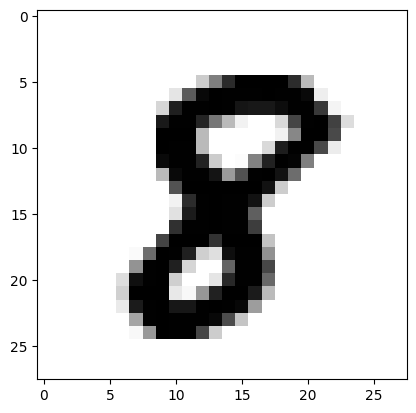

In [24]:
# Use the correct data loader iterator
dataiter = iter(trainloader)

# Extract the images and labels
imagens, etiquetas = next(dataiter)

# Display the first image
plt.imshow(imagens[0].numpy().squeeze(), cmap='gray_r')
plt.show()


In [25]:
print(imagens[0].shape)
print(etiquetas[0].shape)

torch.Size([1, 28, 28])
torch.Size([])


### Explicação do Código
**Importações Necessárias:**
- torch.nn: Módulo de PyTorch contendo classes para definir camadas de redes neurais.
- torch.nn.functional: Módulo contendo funções úteis como funções de ativação e operações sobre tensores.
- __init__: Método inicializador da classe.
- super(Modelo, self).__init__(): Chama o inicializador da classe base nn.Module.
- self.linear1 = nn.Linear(28*28, 128): Define uma camada totalmente conectada com 784 entradas (28x28 pixels de uma imagem) e 128 saídas.
- self.linear2 = nn.Linear(128, 64): Define uma camada totalmente conectada com 128 entradas e 64 saídas.
- self.linear3 = nn.Linear(64, 10): Define uma camada totalmente conectada com 64 entradas e 10 saídas.
- forward: Método que define o fluxo de dados através da rede.
- x = F.relu(self.linear1(x)): Aplica a camada linear1 seguida pela função de ativação ReLU.
- x = F.relu(self.linear2(x)): Aplica a camada linear2 seguida pela função de ativação ReLU.
- x = self.linear3(x): Aplica a camada linear3 (camada de saída).
return F.log_softmax(x, dim=1): Aplica a função de ativação log softmax à saída para obter probabilidades logarítmicas, útil para cálculo de perda em problemas de classificação.

In [26]:
import torch.nn as nn
import torch.nn.functional as F

class Modelo(nn.Module):
    def __init__(self):
        super(Modelo, self).__init__()
        self.linear1 = nn.Linear(28*28, 128)  # camada de entrada, 784 neurônios que se ligam a 128
        self.linear2 = nn.Linear(128, 64)  # camada interna 1, 128 neurônios que se ligam a 64
        self.linear3 = nn.Linear(64, 10)  # camada interna 2, 64 neurônios que se ligam a 10
        # para a camada de saída não é necessário definir nada pois só precisamos pegar o output da camada interna 2

    def forward(self, x):
        x = F.relu(self.linear1(x))  # função de ativação da camada de entrada para a camada interna 1
        x = F.relu(self.linear2(x))  # função de ativação da camada interna 1 para a camada interna 2
        x = self.linear3(x)  # função de ativação da camada interna 2 para a camada de saída, nesse caso f(x) = x
        return F.log_softmax(x, dim=1)  # dados utilizados para calcular a perda


Este código treina uma rede neural em um conjunto de dados usando o método de descida do gradiente estocástico com retropropagação para minimizar a perda, ajustando os pesos da rede ao longo de várias épocas.

In [27]:
import torch.optim as optim
import torch.nn as nn

def treino(modelo, trainloader, device):
    otimizador = optim.SGD(modelo.parameters(), lr=0.01, momentum=0.5)  # define a política de atualização dos pesos e da bias
    inicio = time()  # timer para sabermos quanto tempo levou o treino

    criterio = nn.NLLLoss()  # definindo o critério para calcular a perda
    EPOCHS = 10  # número de epochs que o algoritmo rodará
    modelo.train()  # ativando o modo de treinamento do modelo

    for epoch in range(EPOCHS):
        perda_acumulada = 0  # inicialização da perda acumulada da epoch em questão

        for imagens, etiquetas in trainloader:
            imagens = imagens.view(imagens.shape[0], -1)  # convertendo as imagens para "vetores" de 28*28 casas para ficarem compatíveis com a entrada da rede
            otimizador.zero_grad()  # zerando os gradientes por conta do ciclo anterior

            output = modelo(imagens.to(device))  # colocando os dados no modelo
            perda_instantanea = criterio(output, etiquetas.to(device))  # calculando a perda da epoch em questão

            perda_instantanea.backward()  # backpropagation a partir da perda
            otimizador.step()  # atualizando os pesos e as bias

            perda_acumulada += perda_instantanea.item()  # atualização da perda acumulada


Este código define uma função de validação para um modelo de classificação de imagens em PyTorch. Ele avalia a precisão do modelo em um conjunto de dados de validação, comparando as previsões do modelo com as etiquetas corretas e imprimindo a precisão final.

In [29]:
def validação(modelo, valloader, device):
    conta_corretas, conta_todas = 0, 0
    for imagens, etiquetas in valloader:
        for i in range(len(etiquetas)):
            img = imagens[i].view(1, 784)

            # Desativar o autograd para acelerar a validação. Grafos computacionais dinâmicos têm um custo alto de processamento
            with torch.no_grad():
                logps = modelo(img.to(device))  # Output do modelo em escala logarítmica

            ps = torch.exp(logps)  # Converte output para escala normal (lembrando que é um tensor)
            probab = list(ps.cpu().numpy()[0])
            etiqueta_pred = probab.index(max(probab))  # Converte o tensor em um número, no caso, o número que o modelo previu como correto
            etiqueta_certa = etiquetas.numpy()[i]
            if (etiqueta_certa == etiqueta_pred):  # Compara a previsão com o valor correto
                conta_corretas += 1
            conta_todas += 1

    print("Total de imagens testadas =", conta_todas)
    print("\nPrecisão do modelo = {:.2f}%".format(conta_corretas * 100 / conta_todas))


Este trecho de código é essencial para configurar o ambiente de execução do modelo em PyTorch, garantindo que ele utilize a GPU se disponível, ou a CPU caso contrário. Isso é crucial para acelerar o treinamento e a inferência em redes neurais, já que as GPUs são otimizadas para operações de processamento paralelo, comuns em deep learning.

In [30]:
modelo = Modelo()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelo.to(device)


Modelo(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
)